Enter footing width (in meters):  3
Enter footing length (in meters):  3
Enter depth of footing (in meters):  1.5
Enter applied load (in kN):  2224
Enter unit weight (in kN/m³):  18.85
Enter eccentricity (e/B, unitless):  0.05
Enter load inclination angle (in degrees):  10
Enter distance to slope (in meters):  1.5
Enter slope angle (H:V ratio):  3


Footing width: 3.000 m
Footing length: 3.000 m
Depth of footing: 1.500 m
Applied load: 2224.00 N
Unit weight: 18.85 kN/m³
Eccentricity: 0.05
Load inclination angle: 10.0 degrees
Distance to slope: 1.50 m
Slope angle: 3.0


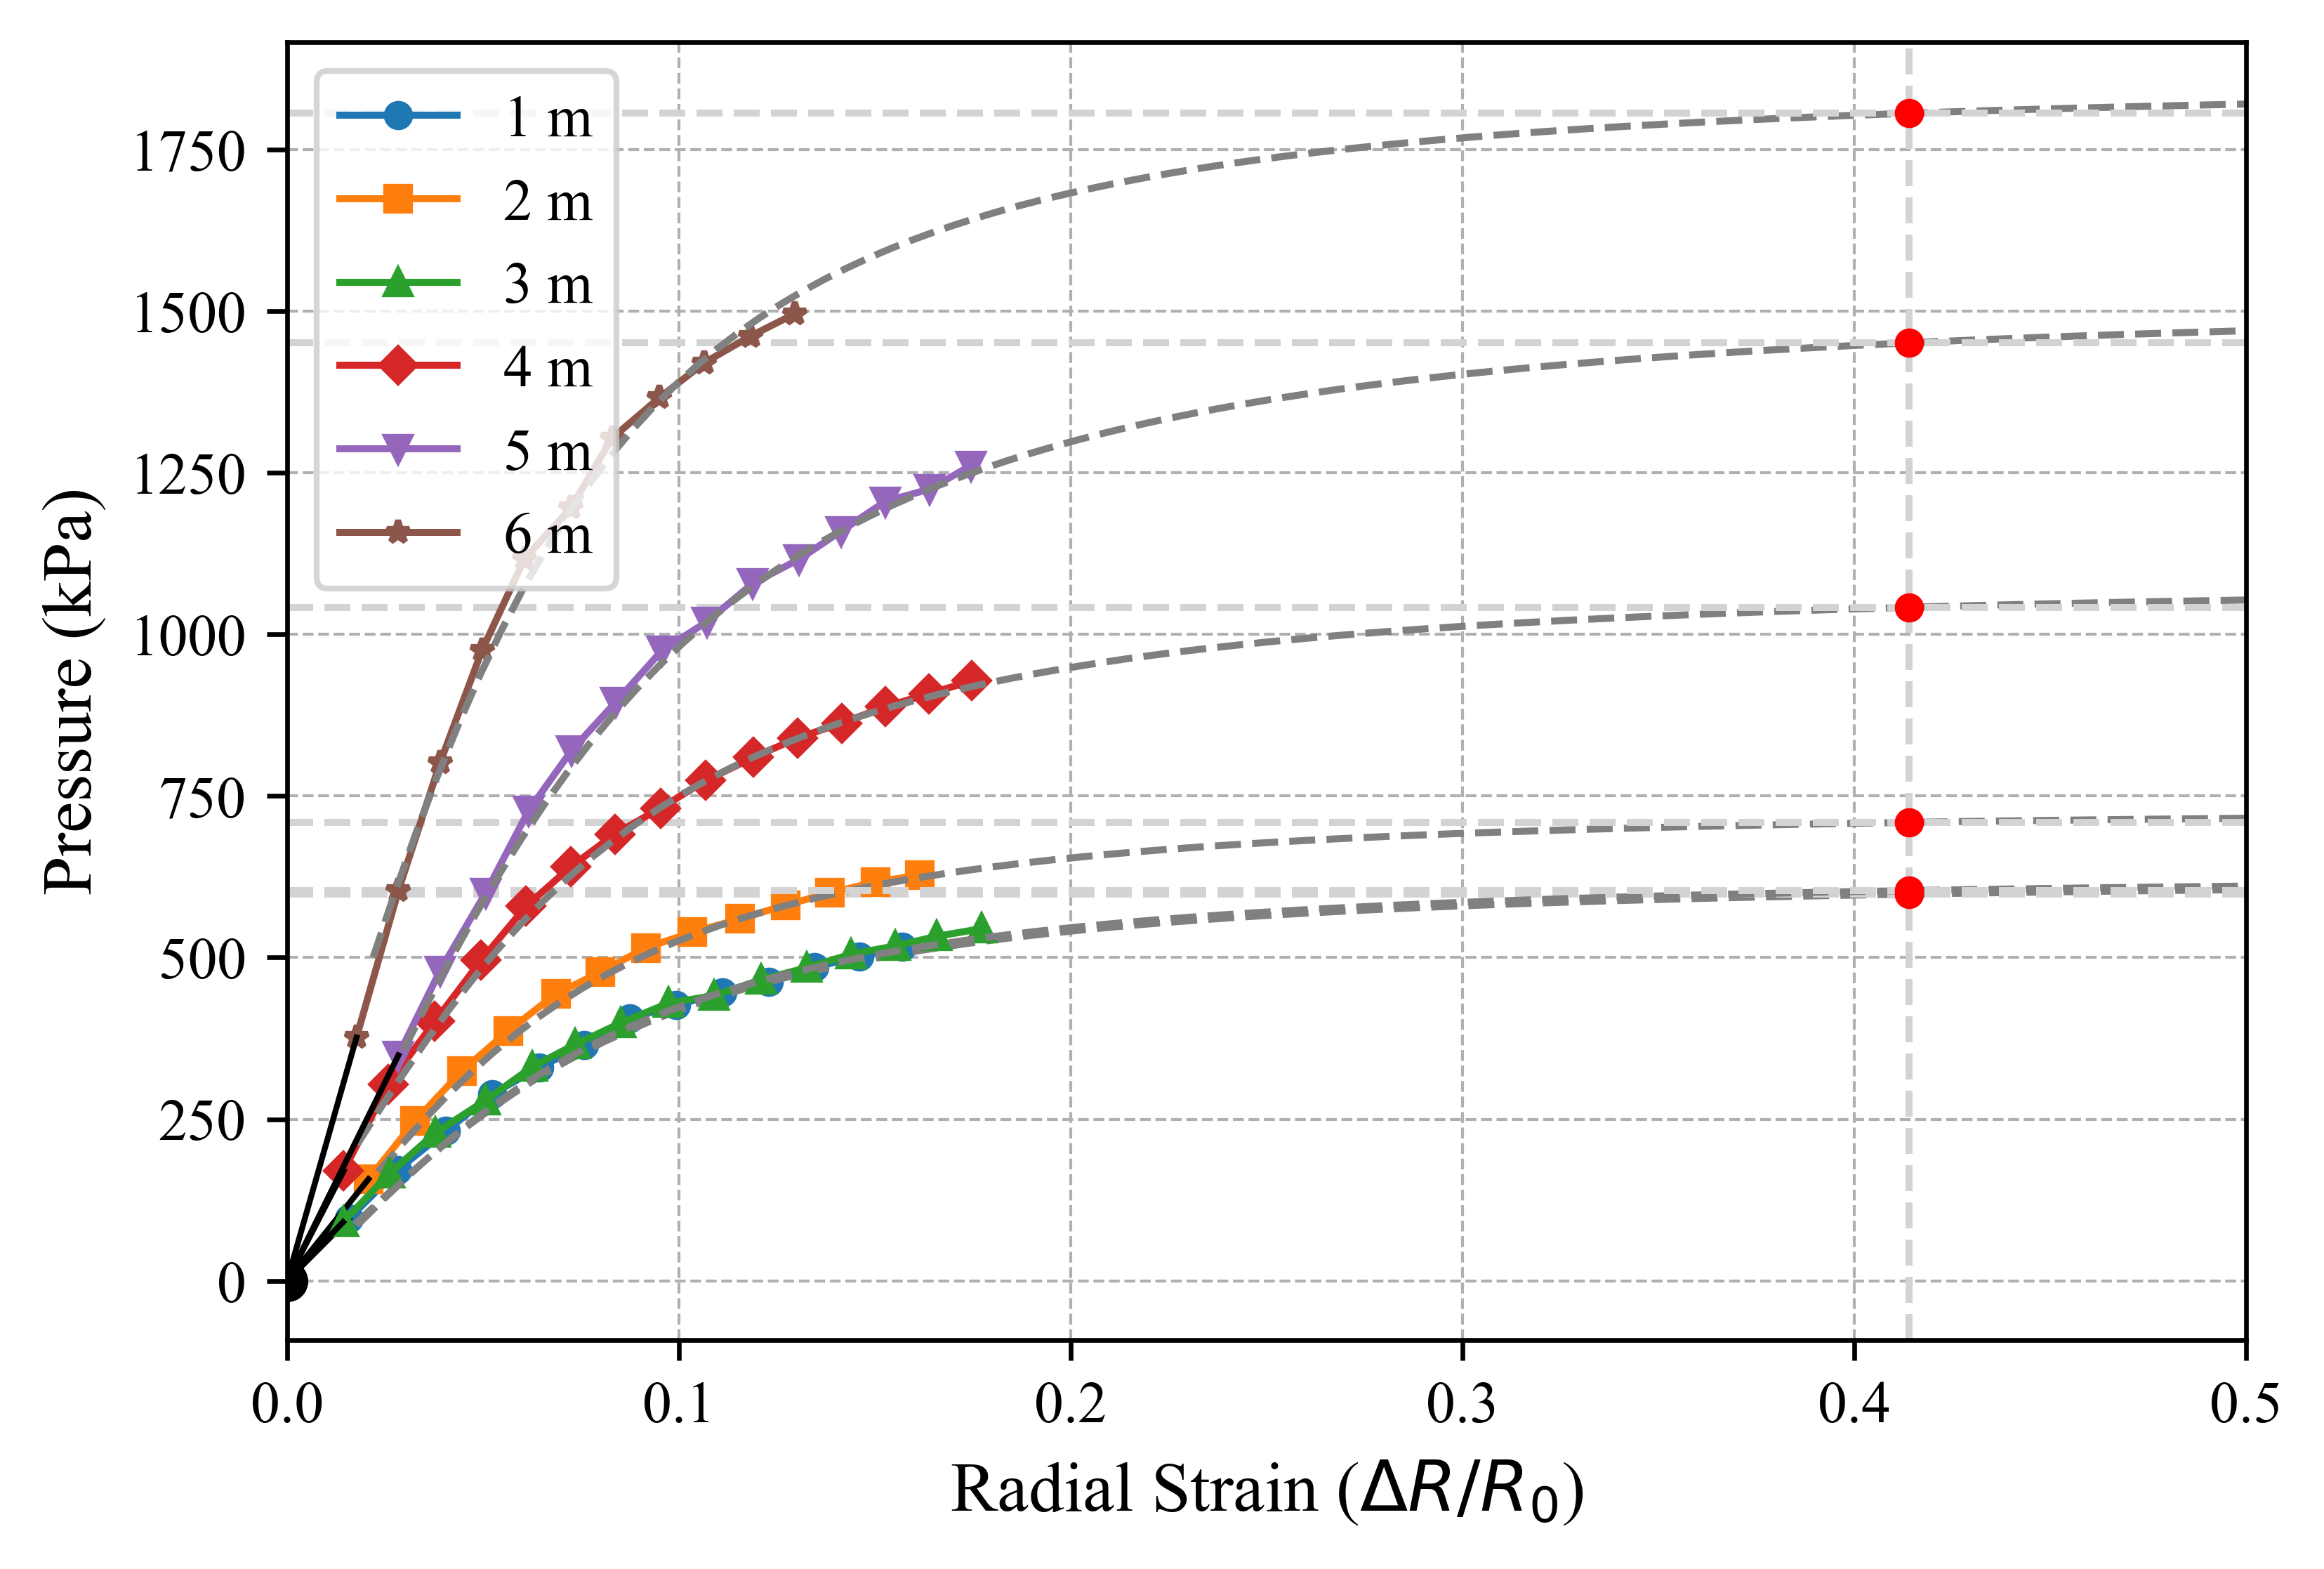

Combined Pressure Table for Specified Strain Levels:
    Strain Level         1 m         2 m         3 m          4 m  \
0       0.000042    0.255447    0.317925    0.266851     0.494614   
1       0.005172   31.458282   39.152427   32.862749    60.911656   
2       0.010387   63.175034   78.626540   65.995508   122.323778   
3       0.021226  129.096804  160.671619  134.860380   249.965971   
4       0.031161  185.826240  235.879613  192.980697   347.707181   
5       0.042452  240.819723  310.513192  246.911247   439.169810   
6       0.062774  324.496067  416.244145  331.570859   588.944862   
7       0.084000  393.865435  490.573322  395.502433   692.118072   
8       0.127355  471.143664  581.476705  475.987790   831.918767   
9       0.169806  518.505088  631.672113  537.018554   919.056012   
10      0.210452  547.073717  660.176098  552.388832   958.754763   
11      0.252903  566.195962  678.807542  571.528843   989.831102   
12      0.294000  578.620145  690.724291  583.9784

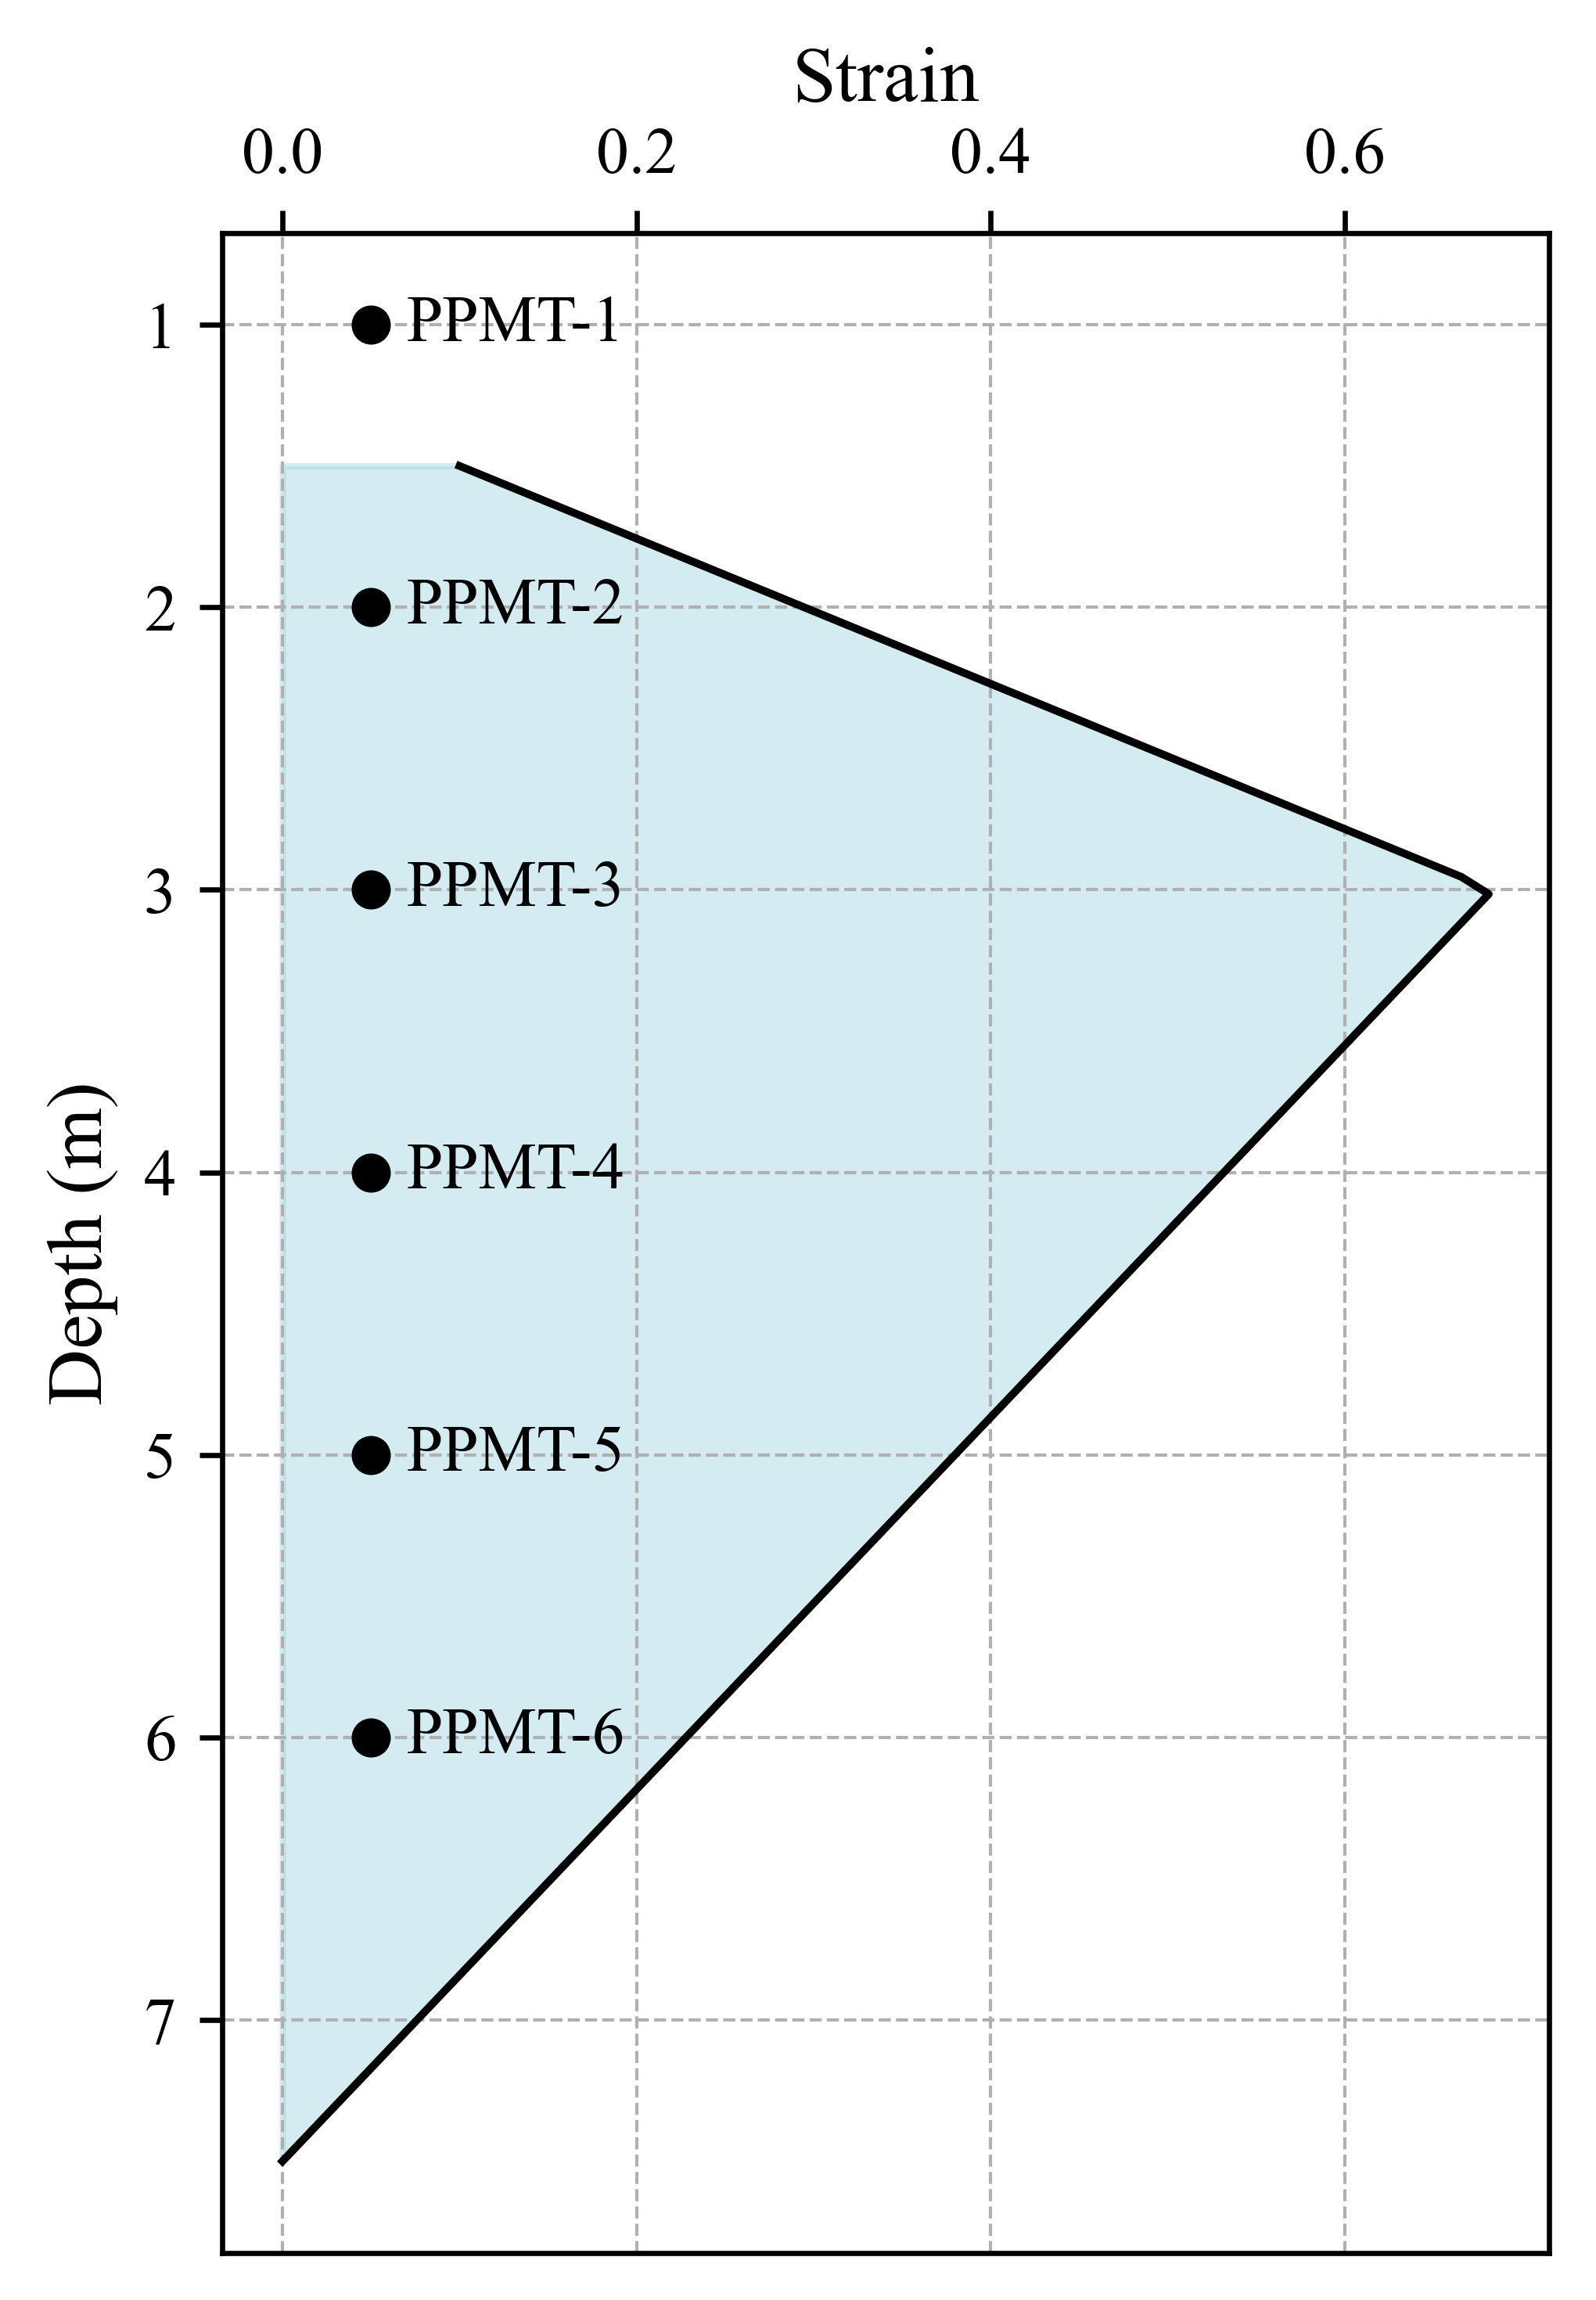

Test depths (ft): [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
    Strain Level  Weighted Average Pressure (kPa)
0       0.000042                         0.462376
1       0.005172                        56.941656
2       0.010387                       114.351159
3       0.021226                       233.674098
4       0.031161                       335.660295
5       0.042452                       436.431890
6       0.062774                       591.849953
7       0.084000                       700.278929
8       0.127355                       835.207315
9       0.169806                       926.887264
10      0.210452                       967.107759
11      0.252903                       998.259909
12      0.294000                      1018.437967
13      0.336000                      1032.886101
14      0.378452                      1043.428723
15      0.420000                      1051.114847


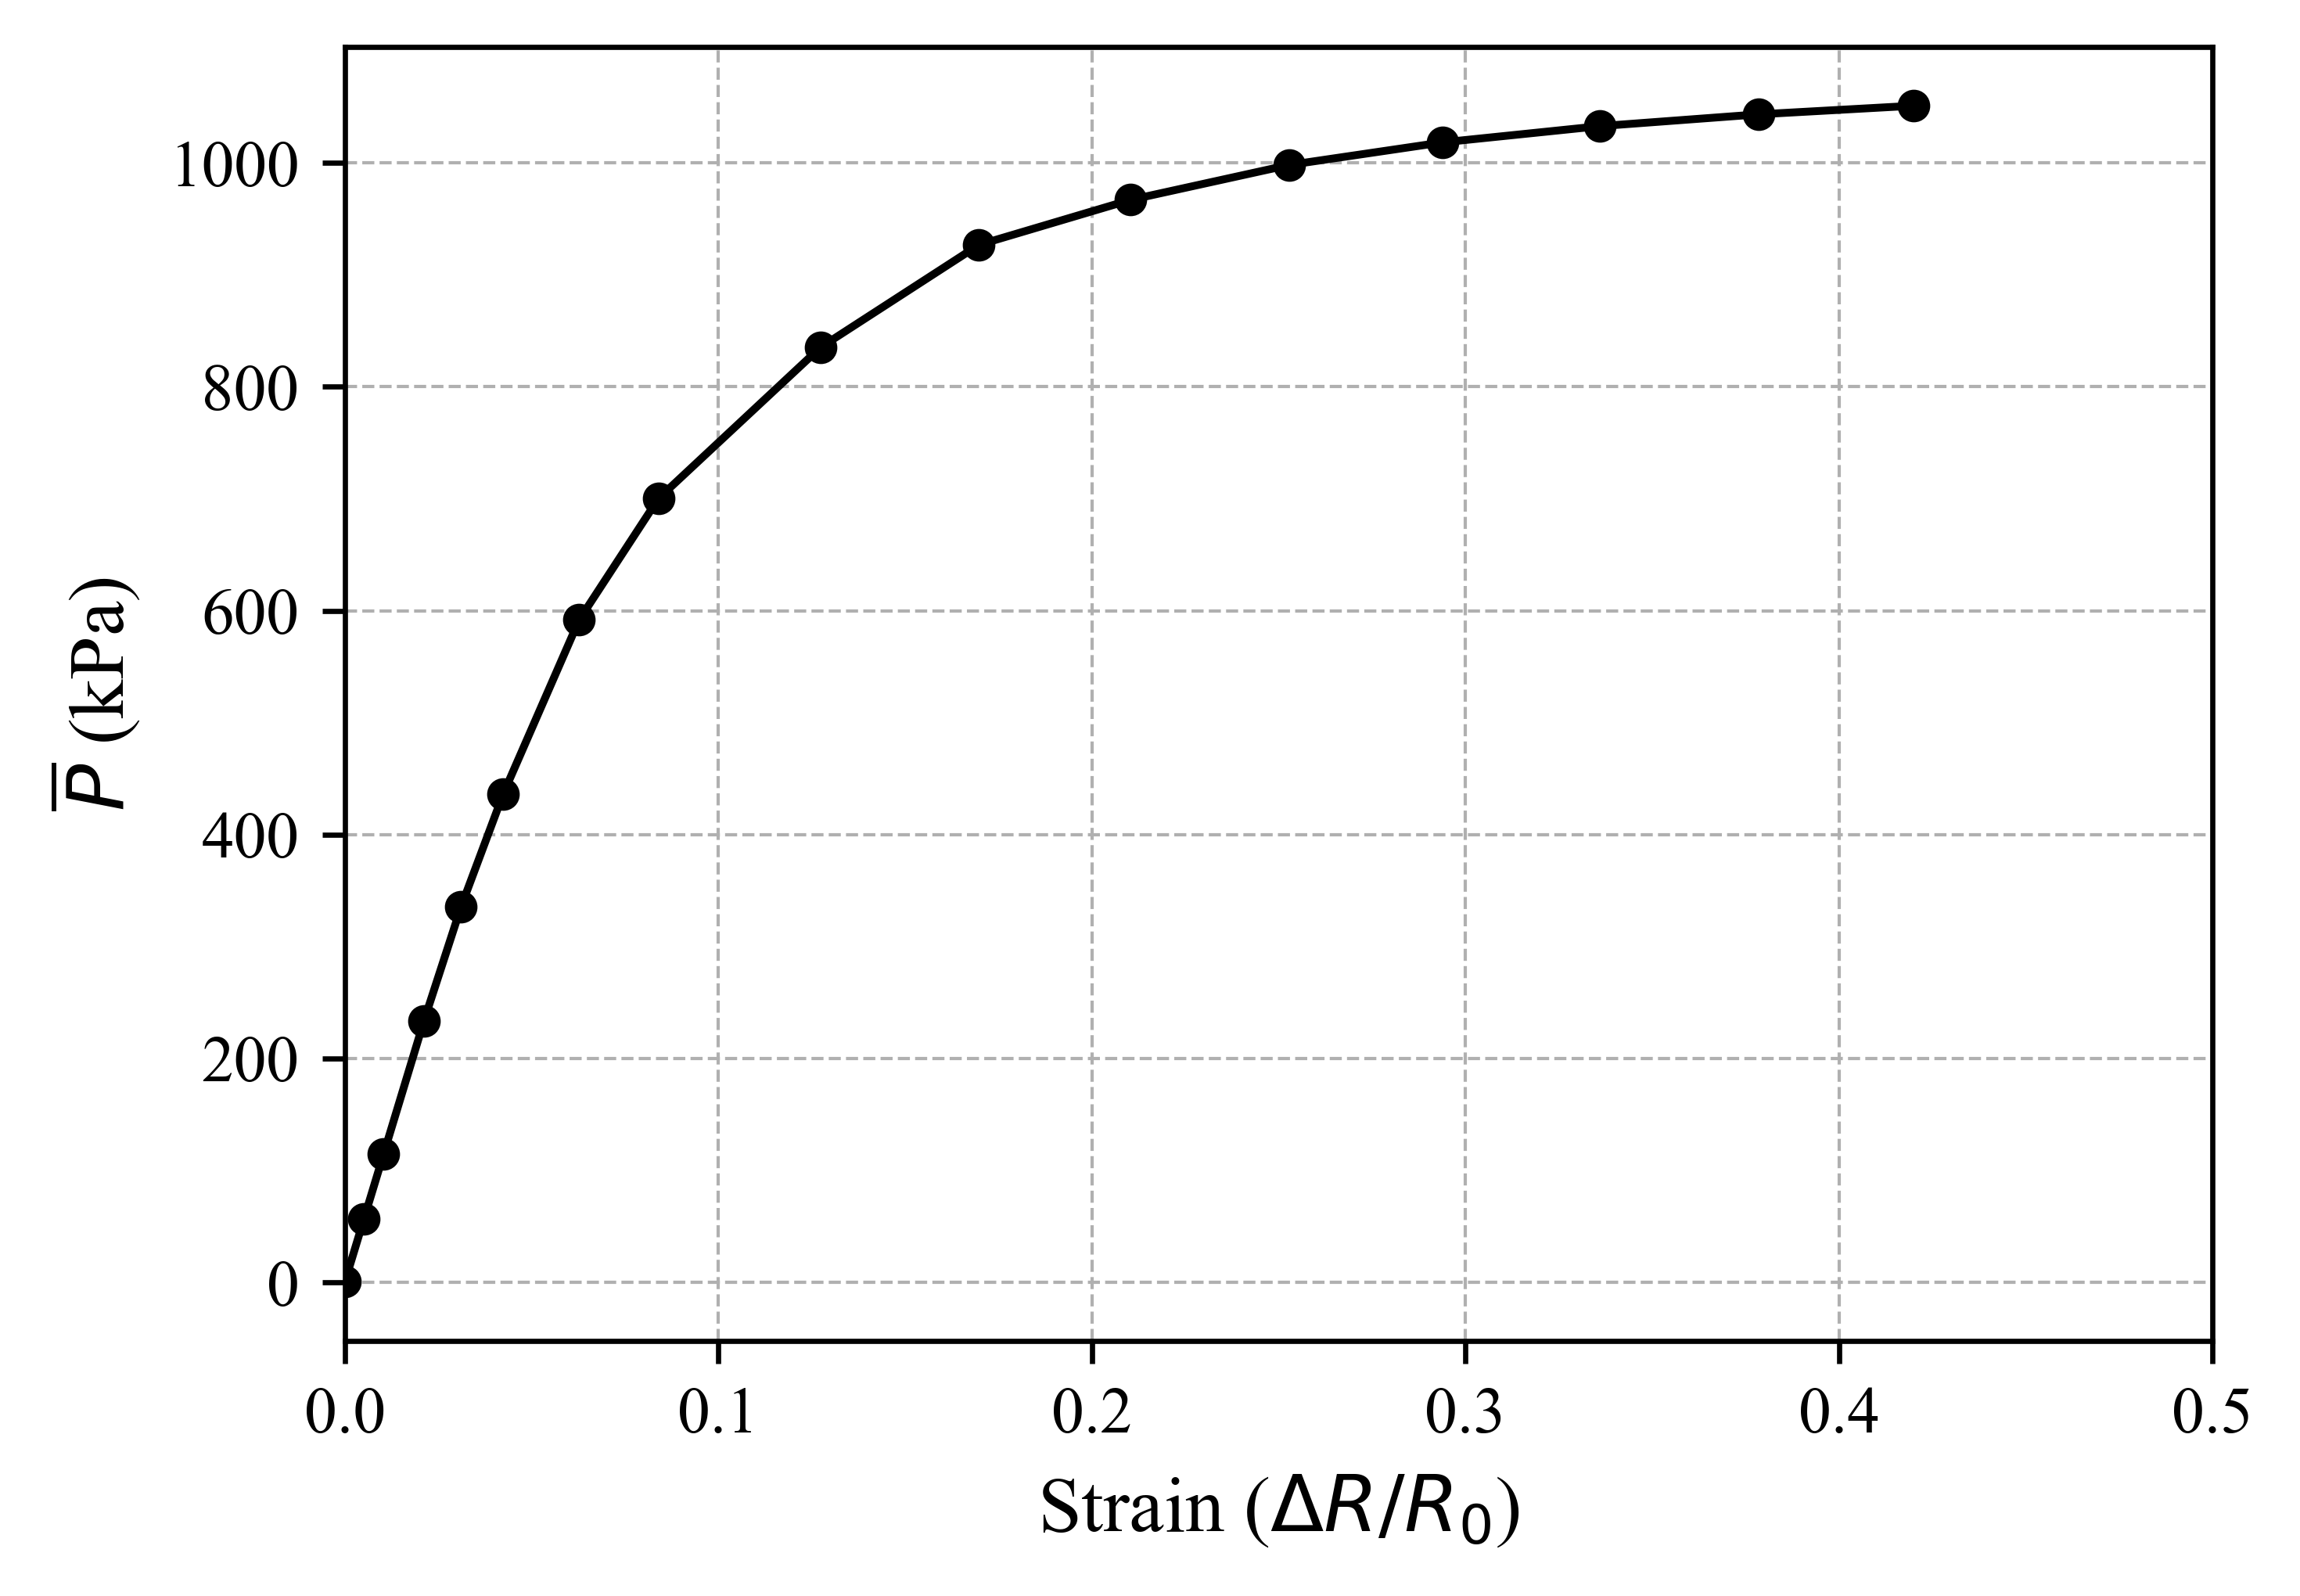

Weighted average pressures saved to ../outputs/weighted_avg_pressures_output.xlsx


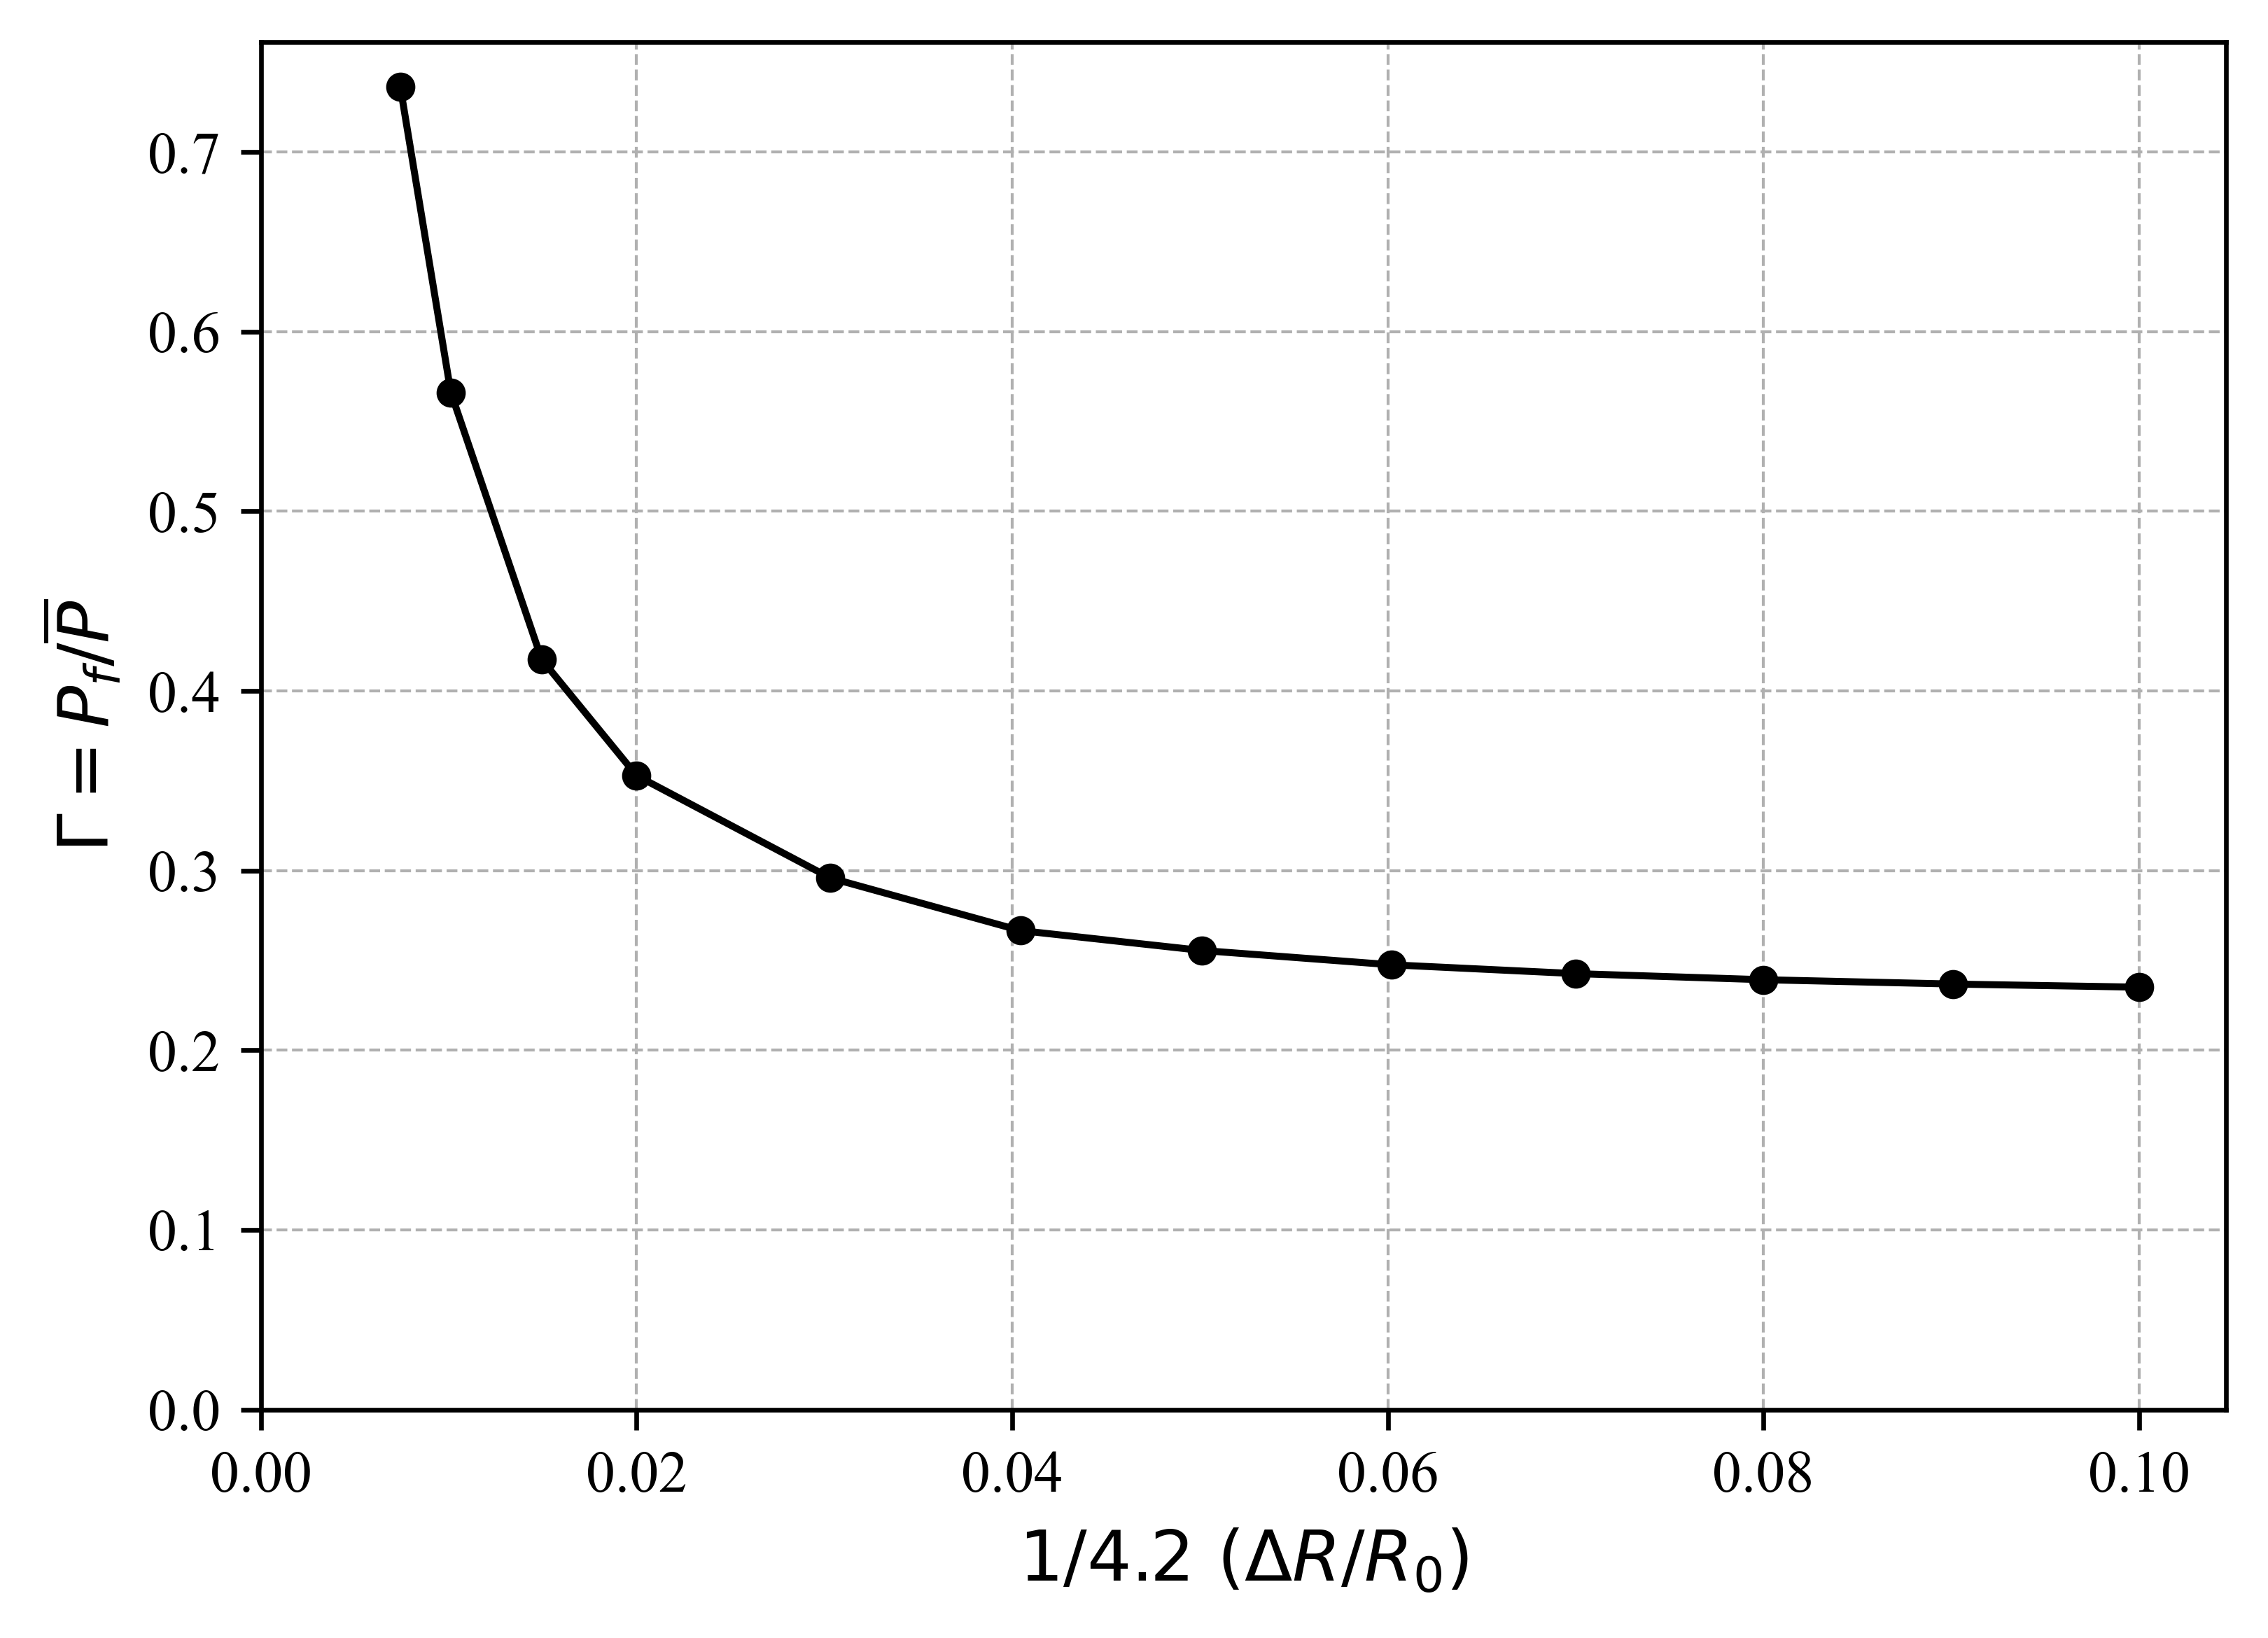

    deltaR/R0          WAP       s/B     s (m)         Γ         f  \
0    0.000042     0.462376  0.000010  0.000030  8.992896  0.539013   
1    0.005172    56.941656  0.001231  0.003694  2.511507  0.539013   
2    0.010387   114.351159  0.002473  0.007419  2.087804  0.539013   
3    0.021226   233.674098  0.005054  0.015161  1.727594  0.539013   
4    0.031161   335.660295  0.007419  0.022258  1.560460  0.539013   
5    0.042452   436.431890  0.010108  0.030323  1.437701  0.539013   
6    0.062774   591.849953  0.014946  0.044839  1.296130  0.539013   
7    0.084000   700.278929  0.020000  0.060000  1.199849  0.539013   
8    0.127355   835.207315  0.030323  0.090968  1.074562  0.539013   
9    0.169806   926.887264  0.040430  0.121290  0.995687  0.539013   
10   0.210452   967.107759  0.050108  0.150323  0.940644  0.539013   
11   0.252903   998.259909  0.060215  0.180645  0.895938  0.539013   
12   0.294000  1018.437967  0.070000  0.210000  0.860892  0.539013   
13   0.336000  1032.

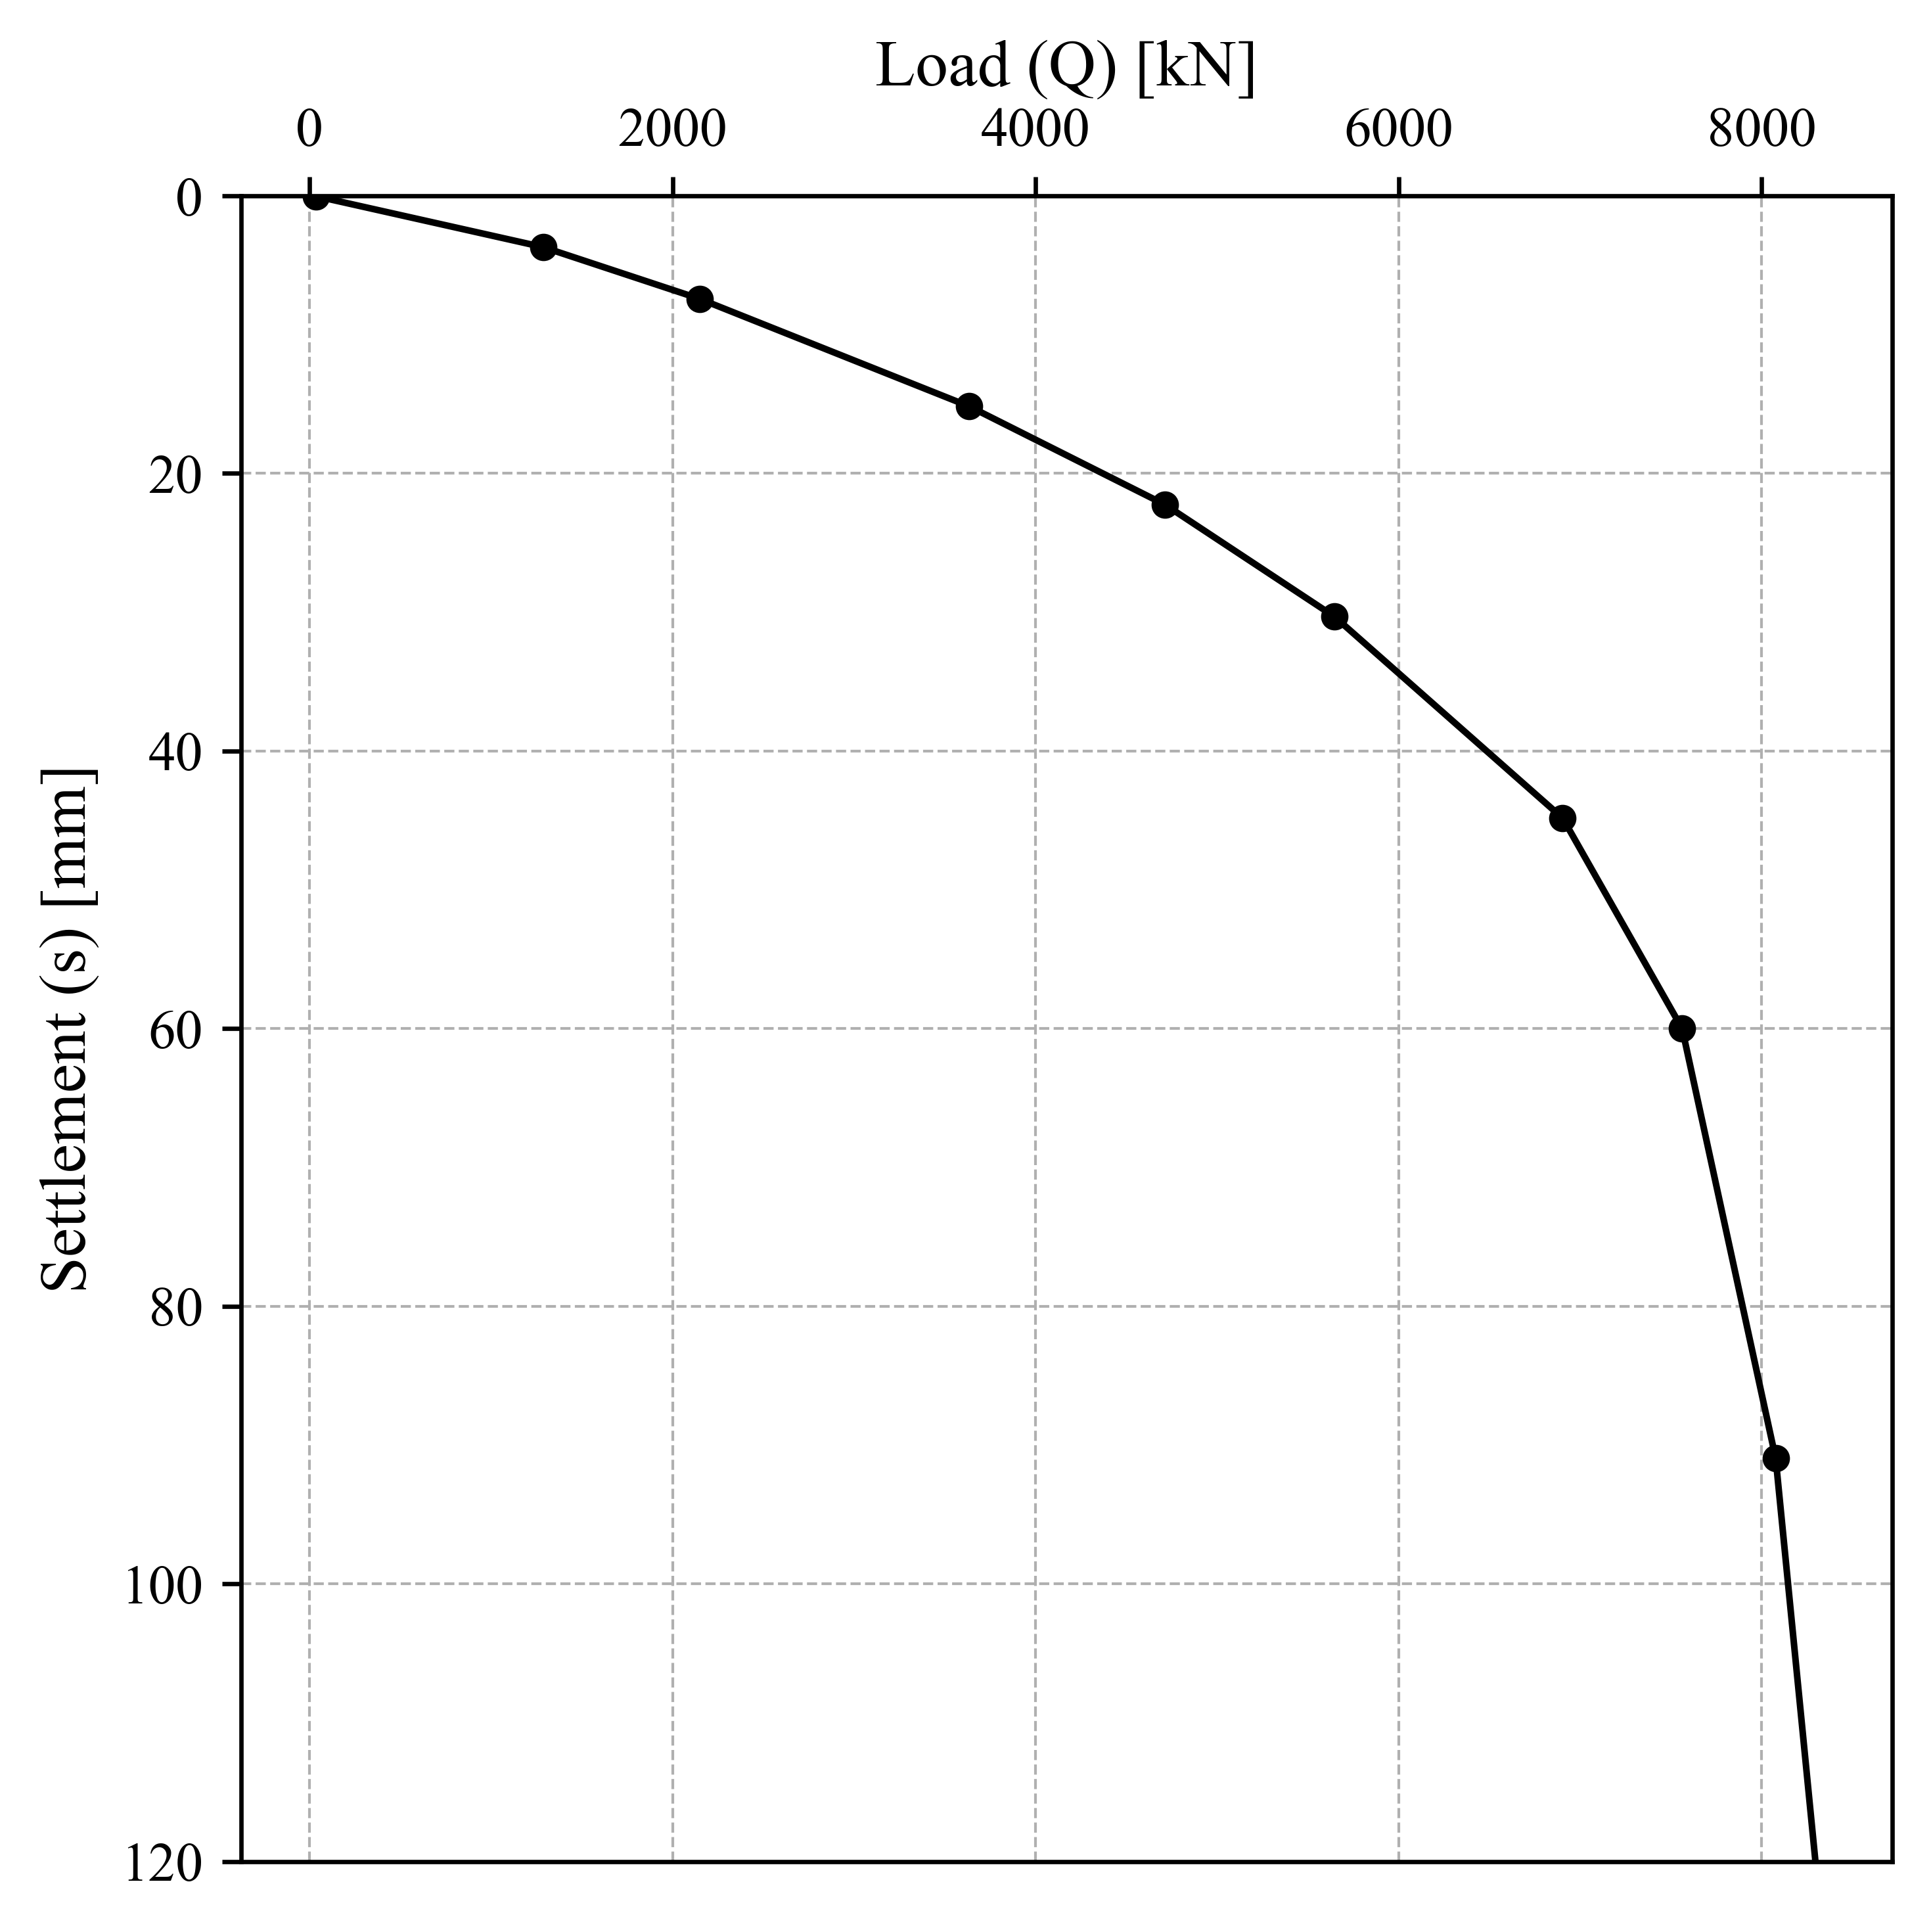

File saved at: C:\Users\brhan\OneDrive\Desktop\PPMT_Automated Load-Settlement Curve\PPMT_Automatic-Load-settlement-curve\outputs\settlement_load_calculations.xlsx


In [31]:
"""
Briaud 2007 Approach: Pushed-in PENCEL Pressuremeter Data Analysis and Load-Settlement Calculation

This script performs the following:
    1. Reads pressuremeter data from an Excel file.
    2. Processes the data to find the intersection point between two
       straight lines on the loading curve.
    3. Shifs data such that the intersection point becomes the origin and 
        applies Lemee extrapolation and 
    4. Extracts pressures at specified strain levels.
    5. Calculates weighted average pressures based on the strain influence areas.
    6. Computes settlement and load parameters using a composite influence factor.
    7. Generates plots for pressure vs. strain, strain influence area, and
       settlement vs. load.

Author: Brhane W. Ygzaw
Date: 03-25-2025
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ------------------------------
# Input Parameters (SI Units)
# ------------------------------
try:
    footing_width = float(input("Enter footing width (in meters): "))
    footing_length = float(input("Enter footing length (in meters): "))
    depth_of_footing = float(input("Enter depth of footing (in meters): "))
    applied_load = float(input("Enter applied load (in kN): "))
    unit_weight = float(input("Enter unit weight (in kN/m³): "))
    eccentricity = float(input("Enter eccentricity (e/B, unitless): "))
    load_inclination_angle = float(input("Enter load inclination angle (in degrees): "))
    distance_to_slope = float(input("Enter distance to slope (in meters): "))
    slope_angle = float(input("Enter slope angle (H:V ratio): "))
except ValueError:
    print("One or more inputs are invalid. Please enter numerical values.")
    raise


print(f"Footing width: {footing_width:.3f} m")
print(f"Footing length: {footing_length:.3f} m")
print(f"Depth of footing: {depth_of_footing:.3f} m")
print(f"Applied load: {applied_load:.2f} N")
print(f"Unit weight: {unit_weight:.2f} kN/m³")
print(f"Eccentricity: {eccentricity}")
print(f"Load inclination angle: {load_inclination_angle} degrees")
print(f"Distance to slope: {distance_to_slope:.2f} m")
print(f"Slope angle: {slope_angle}")

# Calculate area (in m²) and foundation pressure (in kPa)
area_of_footing = footing_width * footing_length  # m²
foundation_pressure = applied_load / area_of_footing # kPa
# ------------------------------
# Helper Functions for Data Processing
# ------------------------------
def find_column(data: pd.DataFrame, keyword: str) -> str:
    """
    Dynamically find the column that contains the specified keyword.
    
    Raises:
        ValueError: If no column with the keyword is found.
    """
    for col in data.columns:
        if keyword.lower() in col.lower():
            return col
    raise ValueError(f"Column containing '{keyword}' not found.")


def find_header_row(raw_data: pd.DataFrame, header_keywords: list) -> int:
    """
    Find the header row in the raw data by checking for all header keywords.
    
    Raises:
        ValueError: If header row with the specified keywords is not found.
    """
    for i, row in raw_data.iterrows():
        row_string = " ".join(row.astype(str).values)
        if all(keyword.lower() in row_string.lower() for keyword in header_keywords):
            return i
    raise ValueError(f"Header row with keywords {header_keywords} not found.")


def process_data_and_find_intersection(data: pd.DataFrame):
    """
    Process the data to determine the intersection point between two straight lines.
    
    Returns:
        tuple: (unshifted strain series, reduced pressure series [in kPa],
                intersection strain, intersection pressure, index of wall point)
    """
    radial_strain_col = find_column(data, "Radial Strain (dr/r0)")
    reduced_pressure_col = find_column(data, "Reduced Pressure (psi)")

    # Convert pressure to kPa
    data[reduced_pressure_col] = data[reduced_pressure_col] * 6.89476

    # Remove unloading data (keep only loading until max pressure)
    max_pressure_idx = data[reduced_pressure_col].idxmax()
    loading_data = data.loc[:max_pressure_idx].copy()

    # Calculate differences and change ratios
    loading_data['delta_strain'] = loading_data[radial_strain_col].diff()
    loading_data['delta_pressure'] = loading_data[reduced_pressure_col].diff()
    loading_data['change_ratio'] = loading_data['delta_strain'] / loading_data['delta_pressure']

    # Find index of minimum change ratio (defines second straight line)
    min_change_idx = loading_data['change_ratio'].idxmin()

    # Fit the first straight line using the first two points
    num_points_to_fit = 2
    initial_points = loading_data.iloc[:num_points_to_fit]
    strain_first_line = initial_points[radial_strain_col]
    pressure_first_line = initial_points[reduced_pressure_col]
    coeff_first_line = np.polyfit(strain_first_line, pressure_first_line, 1)

    # Fit the second straight line using two points near the minimum change ratio
    strain_second_line = loading_data.loc[[min_change_idx - 1, min_change_idx], radial_strain_col]
    pressure_second_line = loading_data.loc[[min_change_idx - 1, min_change_idx], reduced_pressure_col]
    coeff_second_line = np.polyfit(strain_second_line, pressure_second_line, 1)

    # Calculate the intersection point of the two lines
    m1, c1 = coeff_first_line
    m2, c2 = coeff_second_line
    intersection_strain = (c2 - c1) / (m1 - m2)
    intersection_pressure = m1 * intersection_strain + c1

    return (loading_data[radial_strain_col], loading_data[reduced_pressure_col],
            intersection_strain, intersection_pressure, min_change_idx)


def lemee_curve(strain, a, b, c):
    """
    Lemee's curve function for extrapolation.
    """
    return (b * strain ** 2 + a * c) / (strain ** 2 + a)


def perform_lemee_extrapolation(unshifted_strain, reduced_pressure, strain1, pressure1):
    """
    Fit the Lemee curve to the unshifted data and ensure it passes through the wall point.
    
    Returns:
        tuple: (extrapolation strain array, extrapolated pressure array)
    """
    params, _ = curve_fit(lemee_curve, unshifted_strain, reduced_pressure)
    a, b, c = params

    # Adjust 'c' so the curve passes through (strain1, pressure1)
    c = (pressure1 * (strain1 ** 2 + a)) / (b * strain1 ** 2 + a)

    # Extrapolate data up to a specified limit
    extrapolation_strain = np.linspace(strain1, 0.414 + max(unshifted_strain), 100)
    extrapolation_pressure = lemee_curve(extrapolation_strain, a, b, c)

    return extrapolation_strain, extrapolation_pressure


def shift_data_to_intersection(strains, pressures, intersection_strain, intersection_pressure):
    """
    Shift strain and pressure data so that the intersection point becomes the origin.
    
    Returns:
        tuple: (shifted strain data, shifted pressure data)
    """
    shifted_strain = strains - intersection_strain
    shifted_pressure = pressures - intersection_pressure

    # Force the first data point to be exactly zero
    if isinstance(shifted_strain, pd.Series):
        shifted_strain.iloc[0] = 0.0
    else:  # Assume it's a NumPy array
        shifted_strain[0] = 0.0

    if isinstance(shifted_pressure, pd.Series):
        shifted_pressure.iloc[0] = 0.0
    else:
        shifted_pressure[0] = 0.0

    return shifted_strain, shifted_pressure


def extract_pressure_for_strain_level(strain_level, shifted_wall_strain,
                                      shifted_wall_pressure, intersection_strain,
                                      intersection_pressure, valid_shifted_strain,
                                      valid_reduced_pressure, valid_extrapolation_strain,
                                      valid_extrapolation_pressure):
    """
    Extract pressure for a given strain level based on its location.
    
    Logic:
        1. For strain between the wall and intersection, use the straight-line equation.
        2. For strain in the middle region, interpolate from shifted data.
        3. For strain beyond available shifted data, interpolate from extrapolated data.
    """
    if shifted_wall_strain >= strain_level >= 0:
        slope = (0 - shifted_wall_pressure) / (0 - shifted_wall_strain)
        pressure = shifted_wall_pressure + slope * (strain_level - shifted_wall_strain)
    elif strain_level <= max(valid_shifted_strain):
        pressure = np.interp(strain_level, valid_shifted_strain, valid_reduced_pressure)
    else:
        pressure = np.interp(strain_level, valid_extrapolation_strain, valid_extrapolation_pressure)
    return pressure
# ------------------------------
# Excel File Handling and Plotting Setup
# ------------------------------
file_path = "../data/PPMT_K_1_2.xlsx"
xls = pd.ExcelFile(file_path)

pressures_dict = {}
specified_strains = np.array([
    0.000042, 0.0051723, 0.010387097, 0.021225806, 0.03116129, 0.042451613,
    0.062774194, 0.084, 0.127354839, 0.169806452, 0.210451613, 0.252903226,
    0.294, 0.336, 0.378451613, 0.42
])

import matplotlib.pyplot as plt

# Plot styling for journal-level quality
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'lines.linewidth': 1.2,
    'lines.markersize': 4,
    'grid.linewidth': 0.5,
    'grid.linestyle': '--'
})

fig, ax = plt.subplots(figsize=(6, 4), dpi=600)
limit_strain = 0.414
line_color = 'lightgray'

pressures_dict = {}  # <== RE-DECLARE here to hold all extracted data again

for sheet_name in xls.sheet_names:
    raw_data = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
    header_keywords = ["Radial Strain", "Reduced Pressure"]
    header_row = find_header_row(raw_data, header_keywords)
    data = pd.read_excel(file_path, sheet_name=sheet_name, header=header_row)

    (unshifted_strain, reduced_pressure, intersection_strain,
     intersection_pressure, min_change_idx) = process_data_and_find_intersection(data)

    extrapolation_strain, extrapolation_pressure = perform_lemee_extrapolation(
        unshifted_strain, reduced_pressure, intersection_strain, intersection_pressure)

    shifted_strain, shifted_pressure = shift_data_to_intersection(
        unshifted_strain, reduced_pressure, intersection_strain, intersection_pressure)
    shifted_extrapolation_strain, shifted_extrapolation_pressure = shift_data_to_intersection(
        extrapolation_strain, extrapolation_pressure, intersection_strain, intersection_pressure)

    wall_strain = unshifted_strain.iloc[min_change_idx - 1]
    wall_pressure = reduced_pressure.iloc[min_change_idx - 1]
    shifted_wall_strain = wall_strain - intersection_strain
    shifted_wall_pressure = wall_pressure - intersection_pressure

    valid_shifted_strain = shifted_strain[shifted_strain >= shifted_wall_strain]
    valid_reduced_pressure = shifted_pressure[shifted_strain >= shifted_wall_strain]
    valid_extrapolation_strain = shifted_extrapolation_strain[shifted_extrapolation_strain >= shifted_wall_strain]
    valid_extrapolation_pressure = shifted_extrapolation_pressure[shifted_extrapolation_strain >= shifted_wall_strain]

    # Plot measured data
    # Define distinct markers for each sheet
    marker_list = ['o', 's', '^', 'D', 'v', '*', 'P', 'X', '<', '>']
    marker = marker_list[xls.sheet_names.index(sheet_name) % len(marker_list)]
    
    # Plot measured data with unique marker
    ax.plot(valid_shifted_strain, valid_reduced_pressure,
            marker=marker, linestyle='-', label=sheet_name)


    # Plot extrapolated data
    ax.plot(valid_extrapolation_strain, valid_extrapolation_pressure, linestyle='--', color='gray')

    # Plot wall line
    ax.plot([shifted_wall_strain, 0], [shifted_wall_pressure, 0], 'k-', linewidth=1)
    ax.plot(0, 0, 'ko', markersize=6)

    # Extract pressure for specified strain levels
    pressures_for_strains = []
    for strain_level in specified_strains:
        pressure = extract_pressure_for_strain_level(
            strain_level,
            shifted_wall_strain,
            shifted_wall_pressure,
            0, 0,
            valid_shifted_strain,
            valid_reduced_pressure,
            valid_extrapolation_strain,
            valid_extrapolation_pressure
        )
        pressures_for_strains.append(pressure)

    # Store in dictionary
    pressures_dict[sheet_name] = pressures_for_strains

    # Plot limit pressure point
    limit_pressure = np.interp(limit_strain, valid_extrapolation_strain, valid_extrapolation_pressure)
    ax.axhline(y=limit_pressure, color=line_color, linestyle='--')
    ax.axvline(x=limit_strain, color=line_color, linestyle='--')
    ax.scatter(limit_strain, limit_pressure, color='red', zorder=5)

# Finalize plot
ax.set_xlabel(r'Radial Strain ($\Delta R / R_0$)', fontsize=12)
ax.set_ylabel('Pressure (kPa)', fontsize=12)
# ax.set_title('Rezero to Wall Point', fontsize=14)
ax.grid(True)
ax.legend(loc='best')
# 🔽 LIMIT X-axis to 0.5 strain
ax.set_xlim(0, 0.5)
plt.savefig("../outputs/rezero_wall_point_plot.png", dpi=600, bbox_inches='tight')
plt.show()


# Create and save a combined pressure table
pressure_df = pd.DataFrame({"Strain Level": specified_strains})
for sheet, pressures in pressures_dict.items():
    pressure_df[sheet] = pressures

print("Combined Pressure Table for Specified Strain Levels:")
print(pressure_df)
output_file_path = "../outputs/combined_pressure_table_with_extraction.xlsx"
pressure_df.to_excel(output_file_path, index=False)
print(f"Combined pressure table saved to {output_file_path}")
# ------------------------------
# Strain Influence and Footing Cases (SI Units)
# ------------------------------
def compute_max_strain(q_net, sigma_eff):
    """
    Compute the maximum strain based on net pressure and effective stress.
    """
    if q_net > 0 and sigma_eff > 0:
        return 0.5 + 0.1 * np.sqrt(q_net / sigma_eff)
    else:
        return 0.5


def strain_influence_area(depth_of_footing_m, unit_weight_kNm3, footing_width_m,
                          footing_length_m, applied_load_kN):
    """
    Calculate strain influence parameters based on footing geometry in SI units.

    Parameters:
        depth_of_footing_m: float, depth in meters
        unit_weight_kNm3: float, unit weight in kN/m³
        footing_width_m: float, in meters
        footing_length_m: float, in meters
        applied_load_kN: float, in kN

    Returns:
        tuple: (strains array, depths array in m, zero strain depth in m, max strain)
    """
    L_B_ratio = footing_length_m / footing_width_m
    area_of_footing = footing_width_m * footing_length_m  # m²
    footing_pressure = applied_load_kN / area_of_footing  # kPa

    if L_B_ratio == 1:
        print("Case I: Square or Circular Footing (L/B = 1)")
        strain_at_footing = 0.1
        depth_max_strain = depth_of_footing_m + footing_width_m / 2
        overburden_pressure = unit_weight_kNm3 * depth_max_strain
        q_net = footing_pressure - overburden_pressure
        max_strain = compute_max_strain(q_net, overburden_pressure)
        zero_strain_depth = 2 * footing_width_m + depth_of_footing_m

        depths = np.linspace(depth_of_footing_m, zero_strain_depth, 100)
        strains = np.piecewise(
            depths,
            [depths <= depth_of_footing_m + footing_width_m / 2,
             (depths > depth_of_footing_m + footing_width_m / 2) & (depths <= zero_strain_depth)],
            [lambda z: strain_at_footing + (max_strain - strain_at_footing) *
             (z - depth_of_footing_m) / (footing_width_m / 2),
             lambda z: max_strain * (1 - (z - (depth_of_footing_m + footing_width_m / 2)) /
             (zero_strain_depth - depth_of_footing_m - footing_width_m / 2))]
        )

    elif 1 < L_B_ratio < 10:
        print("Case II: Rectangular Footing (1 < L/B < 10)")
        strain_at_footing = 0.1 + 0.0111 * (L_B_ratio - 1)
        footing_max_strain_depth = 0.5 * footing_width_m + 0.0555 * (L_B_ratio - 1) * footing_width_m
        zero_strain_depth = (2 + 0.222 * (L_B_ratio - 1)) * footing_width_m + depth_of_footing_m
        depth_max_strain = depth_of_footing_m + footing_max_strain_depth
        overburden_pressure = unit_weight_kNm3 * depth_max_strain
        q_net = footing_pressure - overburden_pressure
        max_strain = compute_max_strain(q_net, overburden_pressure)

        depths = np.linspace(depth_of_footing_m, zero_strain_depth, 100)
        strains = np.piecewise(
            depths,
            [depths <= depth_of_footing_m + footing_max_strain_depth,
             (depths > depth_of_footing_m + footing_max_strain_depth) & (depths <= zero_strain_depth)],
            [lambda z: strain_at_footing + (max_strain - strain_at_footing) *
             (z - depth_of_footing_m) / footing_max_strain_depth,
             lambda z: max_strain * (1 - (z - (depth_of_footing_m + footing_max_strain_depth)) /
             (zero_strain_depth - depth_of_footing_m - footing_max_strain_depth))]
        )

    else:
        print("Case III: Strip Footing (L/B ≥ 10)")
        strain_at_footing = 0.2
        depth_max_strain = depth_of_footing_m + footing_width_m
        overburden_pressure = unit_weight_kNm3 * depth_max_strain
        q_net = footing_pressure - overburden_pressure
        max_strain = compute_max_strain(q_net, overburden_pressure)
        zero_strain_depth = 4 * footing_width_m + depth_of_footing_m

        depths = np.linspace(depth_of_footing_m, zero_strain_depth, 100)
        strains = np.piecewise(
            depths,
            [depths <= depth_of_footing_m + footing_width_m,
             (depths > depth_of_footing_m + footing_width_m) & (depths <= zero_strain_depth)],
            [lambda z: strain_at_footing + (max_strain - strain_at_footing) *
             (z - depth_of_footing_m) / footing_width_m,
             lambda z: max_strain * (1 - (z - (depth_of_footing_m + footing_width_m)) /
             (zero_strain_depth - depth_of_footing_m - footing_width_m))]
        )

    return strains, depths, zero_strain_depth, max_strain


def get_strain_at_depth(depth, depths, strains):
    """
    Interpolate to find the strain at a given depth (m).
    """
    return np.interp(depth, depths, strains)


def plot_strain_influence(strains, depths):
    """
    Plot the strain influence area (shaded), publication quality.
    """
    import matplotlib.pyplot as plt

    # Set journal-level styles
    plt.rcParams.update({
        'font.family': 'Times New Roman',
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10,
        'lines.linewidth': 1.2,
        'grid.linewidth': 0.5,
        'grid.linestyle': '--'
    })

    fig, ax = plt.subplots(figsize=(3.5, 5), dpi=600)

    # Plot the curve
    ax.plot(strains, depths, color='black', label='Strain Influence Curve', linewidth=1.2)
    ax.fill_betweenx(depths, 0, strains, color='lightblue', alpha=0.5)

    # Invert Y-axis
    ax.invert_yaxis()
    # Add labeled points: PPMT-1 to PPMT-6 at (0.1, 1) to (0.1, 6)
    for i in range(6):
        depth = i + 1
        x_pos = 0.05
        label = f"PPMT-{i+1}"
        plt.plot(x_pos, depth, marker='o', markersize=5, color='black')
        plt.text(x_pos + 0.02, depth, label,
                 fontsize=10, fontfamily='Times New Roman',
                 verticalalignment='center')

    # Axis labels and title
    ax.set_xlabel("Strain", fontsize=12)
    ax.set_ylabel("Depth (m)", fontsize=12)
    # ax.set_title("Strain Influence Area (Shaded)", fontsize=14)
    ax.grid(True)
    # ax.legend(loc='upper right')
       # Move X-axis labels to top
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    plt.tight_layout()
    plt.savefig("../outputs/strain_influence_plot.png", dpi=600, bbox_inches='tight')
    plt.show()

# Example call (assuming you already converted input values to SI):
strains, depths, zero_strain_depth, max_strain_depth = strain_influence_area(
    depth_of_footing, unit_weight, footing_width, footing_length, applied_load)

plot_strain_influence(strains, depths)
# ------------------------------
# Test Depth Extraction and Dynamic Area Calculation
# ------------------------------
test_depths = []
for sheet_name in xls.sheet_names:
    try:
        depth = float(sheet_name.split()[0])
        test_depths.append(depth)
    except ValueError:
        print(f"Invalid sheet name format: {sheet_name}")
        continue
test_depths.sort()
print(f"Test depths (ft): {test_depths}")


def needs_double_trapezoid(test_depth, max_strain_depth, prev_depth, next_depth):
    """
    Determine if a double trapezoid approach is needed for the middle test.
    """
    return prev_depth < max_strain_depth <= next_depth


def calculate_dynamic_areas(test_depths, depth_of_footing, zero_strain_depth,
                            strains, depths, max_strain_depth):
    """
    Calculate strain influence areas dynamically using the trapezoidal rule.
    
    Returns:
        tuple: (list of areas, total area)
    """
    areas = []
    total_area = 0

    max_strain_value = np.interp(max_strain_depth, depths, strains)

    for i in range(len(test_depths)):
        if i == 0:
            next_depth = test_depths[i + 1] if i + 1 < len(test_depths) else test_depths[i]
            half_depth = 0.5 * (next_depth + test_depths[i])
            strain_at_footing = np.interp(depth_of_footing, depths, strains)
            strain_halfway = np.interp(half_depth, depths, strains)
            area = 0.5 * ((test_depths[i] - depth_of_footing) +
                          0.5 * (next_depth - test_depths[i])) * (strain_at_footing + strain_halfway)
        elif i == len(test_depths) - 1:
            prev_depth = test_depths[i - 1]
            half_above = 0.5 * (test_depths[i] + prev_depth)
            half_below = 0.5 * (test_depths[i] + zero_strain_depth)
            strain_half_above = np.interp(half_above, depths, strains)
            strain_half_below = np.interp(half_below, depths, strains)
            area = 0.5 * (0.5 * (test_depths[i] - prev_depth) +
                          0.5 * (zero_strain_depth - test_depths[i])) * (strain_half_above + strain_half_below)
        else:
            prev_depth = test_depths[i - 1]
            next_depth = test_depths[i + 1]
            half_above = 0.5 * (test_depths[i] + prev_depth)
            half_below = 0.5 * (test_depths[i] + next_depth)
            strain_half_above = np.interp(half_above, depths, strains)
            strain_half_below = np.interp(half_below, depths, strains)

            if needs_double_trapezoid(test_depths[i], max_strain_depth, prev_depth, next_depth):
                print(f"Double trapezoid detected for test depth {test_depths[i]}")
                upper_half_prev = 0.5 * (test_depths[i] + prev_depth)
                upper_area = 0.5 * (max_strain_depth - upper_half_prev) * (strain_half_above + max_strain_value)
                lower_half_next = 0.5 * (test_depths[i] + next_depth)
                lower_area = 0.5 * (lower_half_next - max_strain_depth) * (max_strain_value + strain_half_below)
                area = upper_area + lower_area
            else:
                area = 0.5 * (0.5 * (test_depths[i] - prev_depth) +
                              0.5 * (next_depth - test_depths[i])) * (strain_half_above + strain_half_below)
        areas.append(area)
        total_area += area

    return areas, total_area


areas, total_area = calculate_dynamic_areas(test_depths, depth_of_footing,
                                             zero_strain_depth, strains, depths,
                                             max_strain_depth)

# ------------------------------
# Weighted Average Pressure Calculation
# ------------------------------
def calculate_weighted_average_pressure(specified_strains, pressures_dict, areas, total_area):
    """
    Calculate weighted average pressures based on strain influence areas.
    
    Returns:
        list of weighted average pressures.
    """
    weighted_avg_pressures = []
    for strain_level in specified_strains:
        weighted_pressure_sum = 0
        for i, sheet_name in enumerate(pressures_dict.keys()):
            depth_pressure = pressures_dict[sheet_name]
            strain_idx = np.where(specified_strains == strain_level)[0][0]
            pressure_at_depth = depth_pressure[strain_idx]
            weighted_pressure_sum += pressure_at_depth * areas[i]
        weighted_avg_pressure = weighted_pressure_sum / total_area
        weighted_avg_pressures.append(weighted_avg_pressure)
    return weighted_avg_pressures


weighted_avg_pressures = calculate_weighted_average_pressure(specified_strains,
                                                             pressures_dict, areas, total_area)
weighted_avg_df = pd.DataFrame({
    "Strain Level": specified_strains,
    "Weighted Average Pressure (kPa)": weighted_avg_pressures
})
# weighted_avg_df["Weighted Average Pressure (kPa)"] = weighted_avg_df["Weighted Average Pressure"] * 1

print(weighted_avg_df)
output_file_path = "../outputs/weighted_avg_pressures_output.xlsx"
weighted_avg_df.to_excel(output_file_path, index=False)
# Plot Weighted Average Pressure vs. Strain (in kPa)
# --- Plot 3: Weighted Average Pressure vs. Strain (kPa) ---

import matplotlib.pyplot as plt

# Global journal-quality style settings
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'lines.linewidth': 1.2,
    'lines.markersize': 4,
    'grid.linewidth': 0.5,
    'grid.linestyle': '--'
})

fig, ax = plt.subplots(figsize=(5, 3.5), dpi=600)

# Plot
ax.plot(weighted_avg_df["Strain Level"],
        weighted_avg_df["Weighted Average Pressure (kPa)"],
        marker='o', linestyle='-', color='black', label='Weighted Avg. Pressure')

# Axes and labels
ax.set_xlabel(r'Strain ($\Delta R / R_0$)', fontsize=12)
ax.set_ylabel(r'$\overline{P}$ (kPa)', fontsize=12)

# ax.set_title('Weighted Average Pressure vs. Strain', fontsize=14)

# Grid and limits
ax.grid(True)
# ax.set_xlim([0, 0.6])
# ax.legend(loc='lower right')
# LIMIT X-axis to max 0.5
ax.set_xlim(0, 0.5)
# Save and show
plt.tight_layout()
plt.savefig("../outputs/average_pressure_vs_strain_kpa.png", dpi=600, bbox_inches='tight')
plt.show()

print(f"Weighted average pressures saved to {output_file_path}")

# ------------------------------
# Additional Plot: Footing Pressure vs Pressuremeter Pressure Ratio
# ------------------------------
def power_decay(x, a, b, C):
    """
    Power decay model: y = a * x^(-b) + C.
    """
    return a * np.power(x, -b) + C


def calculate_r_squared(y_true, y_pred):
    """
    Calculate the R² value.
    """
    residuals = y_true - y_pred
    ss_res = np.sum(residuals ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


strain_levels_scaled = specified_strains / 4.2
pressure_ratios = foundation_pressure / weighted_avg_df["Weighted Average Pressure (kPa)"]

mask = strain_levels_scaled >= 0.0051723
filtered_strain_levels_scaled = strain_levels_scaled[mask]
filtered_pressure_ratios = pressure_ratios[mask]

# --- Plot: Pressure Ratio vs 1/4.2(ΔR/R₀) ---

import matplotlib.pyplot as plt

# Set global styling for top-tier plots
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'lines.linewidth': 1.2,
    'lines.markersize': 4,
    'grid.linewidth': 0.5,
    'grid.linestyle': '--'
})

fig, ax = plt.subplots(figsize=(5.5, 4), dpi=600)

# Main curve
ax.plot(filtered_strain_levels_scaled,
        filtered_pressure_ratios,
        marker='o', linestyle='-', color='black', label=r'$\Gamma = q_f / p_{pm}$')

# Axis labels and title
ax.set_xlabel(r'$1/4.2\ (\Delta R / R_0)$', fontsize=12)
ax.set_ylabel(r'$\Gamma = P_f / \overline{P}$', fontsize=12)
# ax.set_title(r'Foundation Pressure to Pressuremeter Pressure Ratio', fontsize=14)

# Axis limits and grid
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.grid(True)
# ax.legend(loc='best')

# Save and display
plt.tight_layout()
plt.savefig("../outputs/foundation_pressure_ratio_plot.png", dpi=600, bbox_inches='tight')
plt.show()



# ------------------------------
# Settlement and Load Calculations
# ------------------------------

def calculate_gamma_formula(strain_levels_scaled):
    """
    Calculate gamma values using the formula:
    gamma = 0.4255 * (strain_levels_scaled) ^ -0.265
    """
    return 0.4255 * (strain_levels_scaled ** -0.265)


def calculate_settlement_and_load(strain_levels, weighted_avg_pressures,
                                  footing_width, footing_length, eccentricity,
                                  load_inclination_angle, distance_to_slope):
    """
    Calculate settlement and load for each strain level.
    
    Returns:
        DataFrame with calculated parameters.
    """
    results = []
    strain_levels_scaled = strain_levels / 4.2
    gamma_values = calculate_gamma_formula(strain_levels_scaled)
    area_of_footing = footing_width * footing_length   # in m²

    for i, deltaR_R0 in enumerate(strain_levels):
        avg_pressure = weighted_avg_pressures[i]

        # Influence factor for foundation shape
        L_B_ratio = footing_length / footing_width
        fL_B = 0.8 + 0.2 * (footing_width / footing_length)

        # Influence factor for eccentricity
        fe_edge = 1 - np.sqrt(eccentricity)
        fe_center = 1 - 0.33 * eccentricity

        # Influence factor for load inclination
        fdelta_edge = 1 - np.sqrt(load_inclination_angle / 360)
        fdelta_center = 1 - (load_inclination_angle / 90) ** 2

        # Influence factor for proximity to slope
        if distance_to_slope / footing_width >= 10:
            fbeta_d = 1
        else:
            fbeta_d = 0.8 * (1 + distance_to_slope / footing_width) ** 0.1

        # Composite influence factor
        f = fL_B * fe_edge * fdelta_edge * fbeta_d
        gamma = gamma_values[i]
        s_B = deltaR_R0 / 4.2
        s = footing_width * s_B  # Settlement in m
        Pf = avg_pressure * gamma
        Q = Pf * area_of_footing   # Load in kPa

        results.append({
            'deltaR/R0': deltaR_R0,
            'WAP': avg_pressure,
            's/B': s_B,
            's (m)': s,
            'Γ': gamma,
            'f': f,
            'pf': Pf,
            'Q': Q
        })

    return pd.DataFrame(results)


strain_levels = specified_strains
weighted_avg_pressures_series = weighted_avg_df['Weighted Average Pressure (kPa)']

settlement_load_df = calculate_settlement_and_load(
    strain_levels, weighted_avg_pressures_series, footing_width,
    footing_length, eccentricity, load_inclination_angle, distance_to_slope
)

print(settlement_load_df)
output_file_path = "../outputs/settlement_load_calculations.xlsx"
settlement_load_df.to_excel(output_file_path, index=False)
print(f"Settlement and load calculations saved to {output_file_path}")

def plot_settlement_vs_load(settlement_load_df):
    """
    Plot Load (kN) vs Settlement (mm), flipped vertically with top X-axis and no legend.
    """
    import matplotlib.pyplot as plt

    # Convert settlement to mm
    settlement_load_df["Settlement (s) (mm)"] = settlement_load_df["s (m)"].abs() * 1000

    # Journal-quality styling
    plt.rcParams.update({
        'font.family': 'Times New Roman',
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'lines.linewidth': 1.2,
        'lines.markersize': 4,
        'grid.linewidth': 0.5,
        'grid.linestyle': '--'
    })

    fig, ax = plt.subplots(figsize=(5, 5), dpi=600)

    # Plot
    ax.plot(settlement_load_df["Q"],
            settlement_load_df["Settlement (s) (mm)"],
            marker='o', linestyle='-', color='black')

    # Invert Y-axis (downward settlement) and limit to 120 mm
    ax.set_ylim(120, 0)

    # Move X-axis labels to top
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    # Labels and title
    ax.set_xlabel('Load (Q) [kN]', fontsize=12)
    ax.set_ylabel('Settlement (s) [mm]', fontsize=12)
    # ax.set_title('Load vs Settlement (Downward)', fontsize=14)

    ax.grid(True)

    # Save and show
    plt.tight_layout()
    plt.savefig("../outputs/settlement_vs_load_plot_flipped.png", dpi=600, bbox_inches='tight')
    plt.show()

plot_settlement_vs_load(settlement_load_df)
import os
print("File saved at:", os.path.abspath(output_file_path))

